In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat

# Spanish dataset

In [2]:
spain_power_data = np.genfromtxt('spain_energy_market.csv', delimiter=',', dtype=None, encoding=None)
data = spain_power_data[...,5] # select column with values
data = data[spain_power_data[...,2] == 'Demanda real'] # select energy demand values
data = data.astype(float) # convert into floats

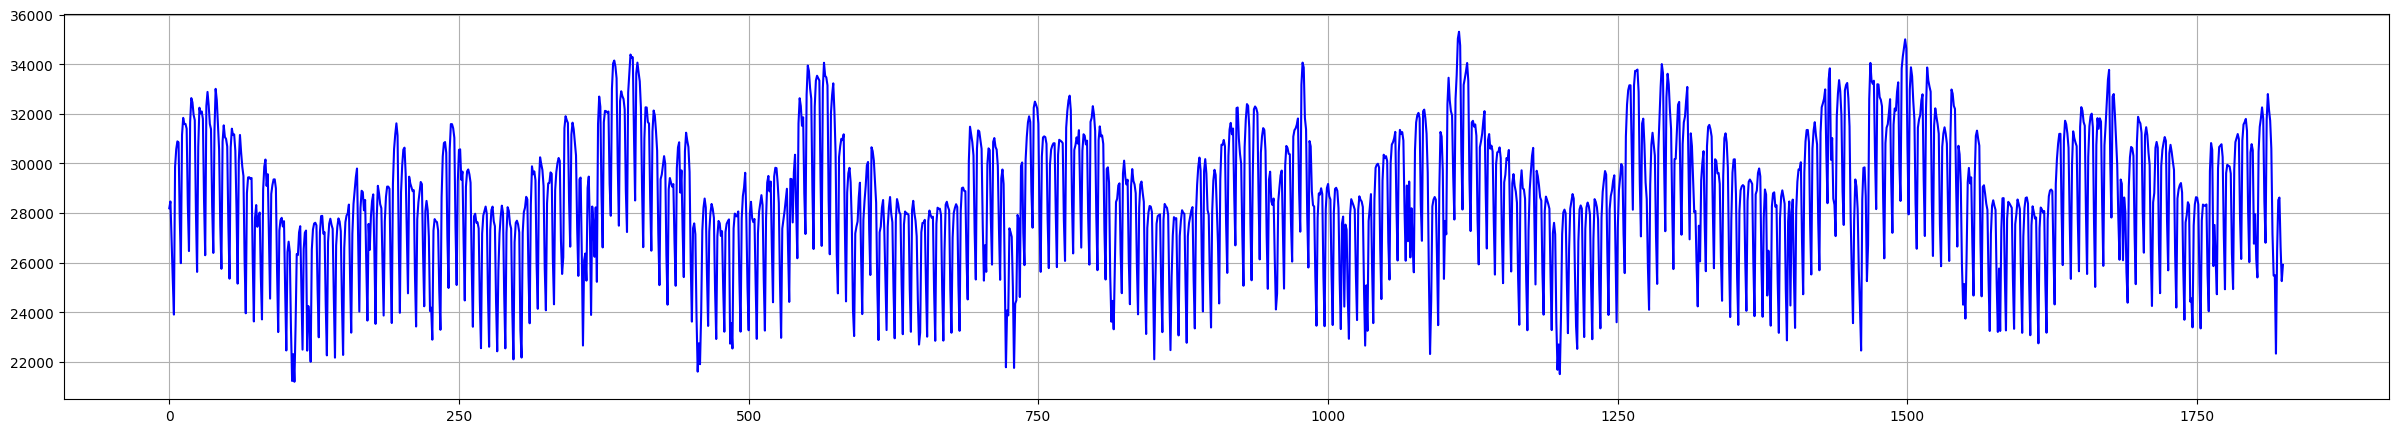

In [3]:
fig = plt.figure(figsize=(30,5))
plt.plot(data, label='time series', color='b')
plt.grid()

## Autocorrelation

(0.0, 20.0)

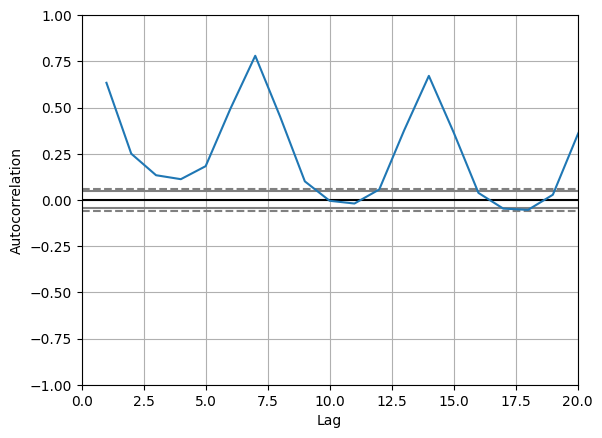

In [4]:
s = pd.Series(data, copy=True)
ax = pd.plotting.autocorrelation_plot(s)
ax.set_xlim([0, 20])

## Remove seasonality

(0.0, 100.0)

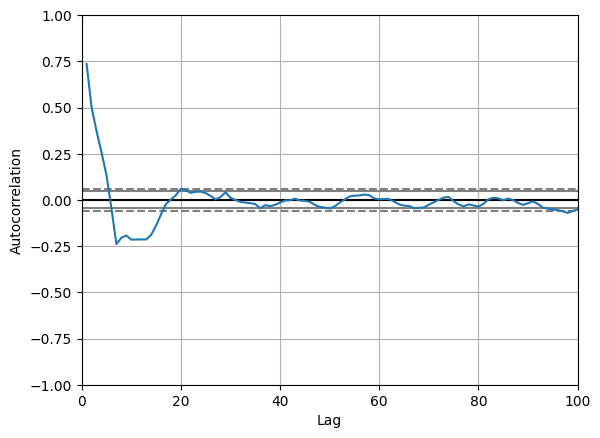

In [5]:
s7 = s.diff(periods=7)[7:]
ax = pd.plotting.autocorrelation_plot(s7)
ax.set_xlim([0, 100])

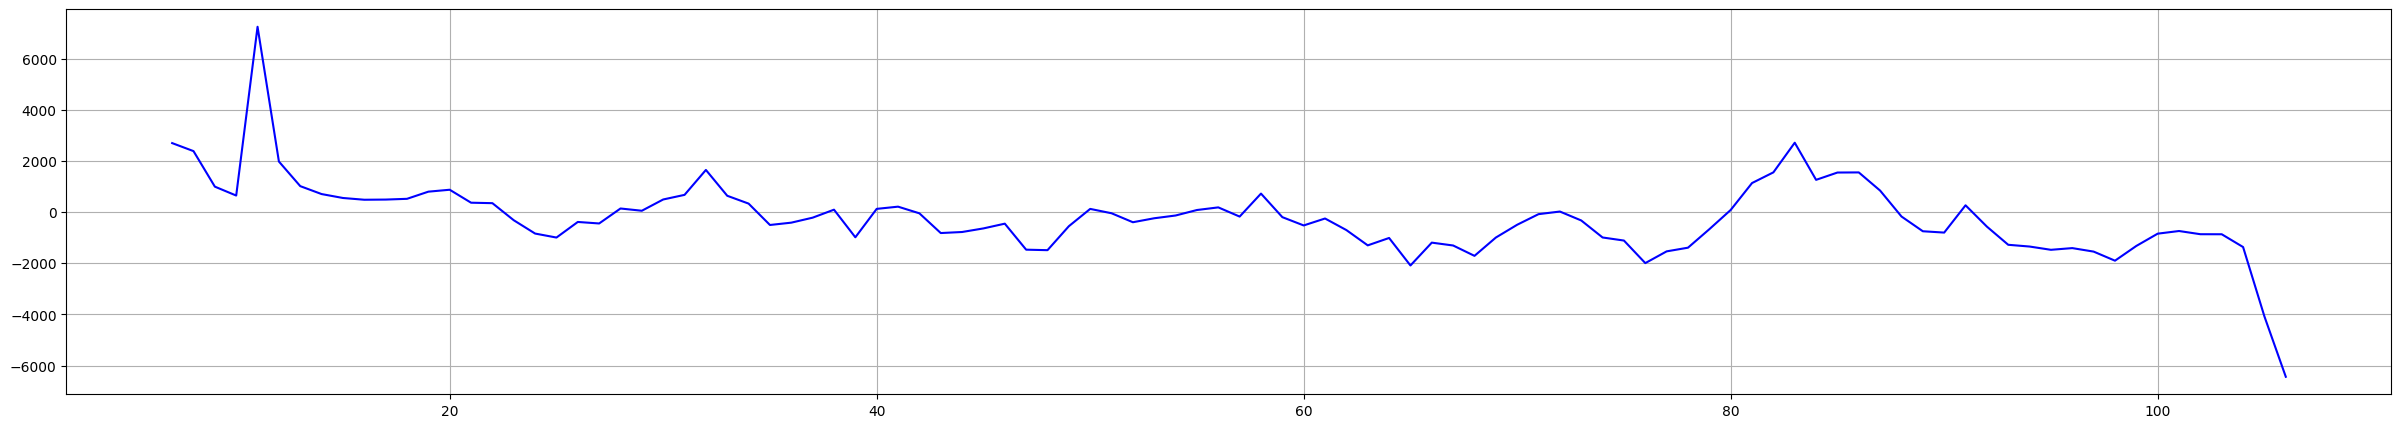

In [6]:
fig = plt.figure(figsize=(30,5))
plt.plot(s7[:100], label='time series', color='b')
plt.grid()

(0.0, 500.0)

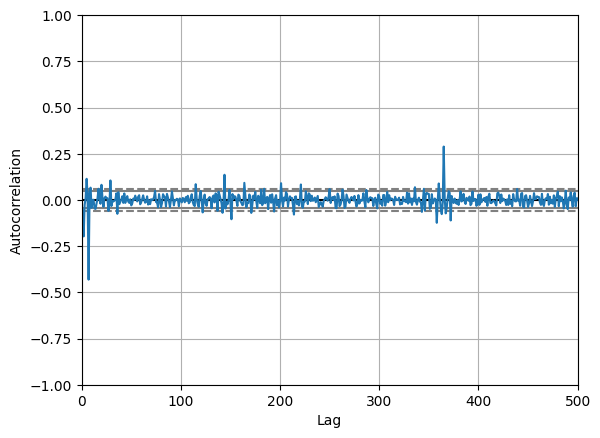

In [7]:
s1 = s7.diff(periods=1)[1:]
ax = pd.plotting.autocorrelation_plot(s1)
ax.set_xlim([0, 500])

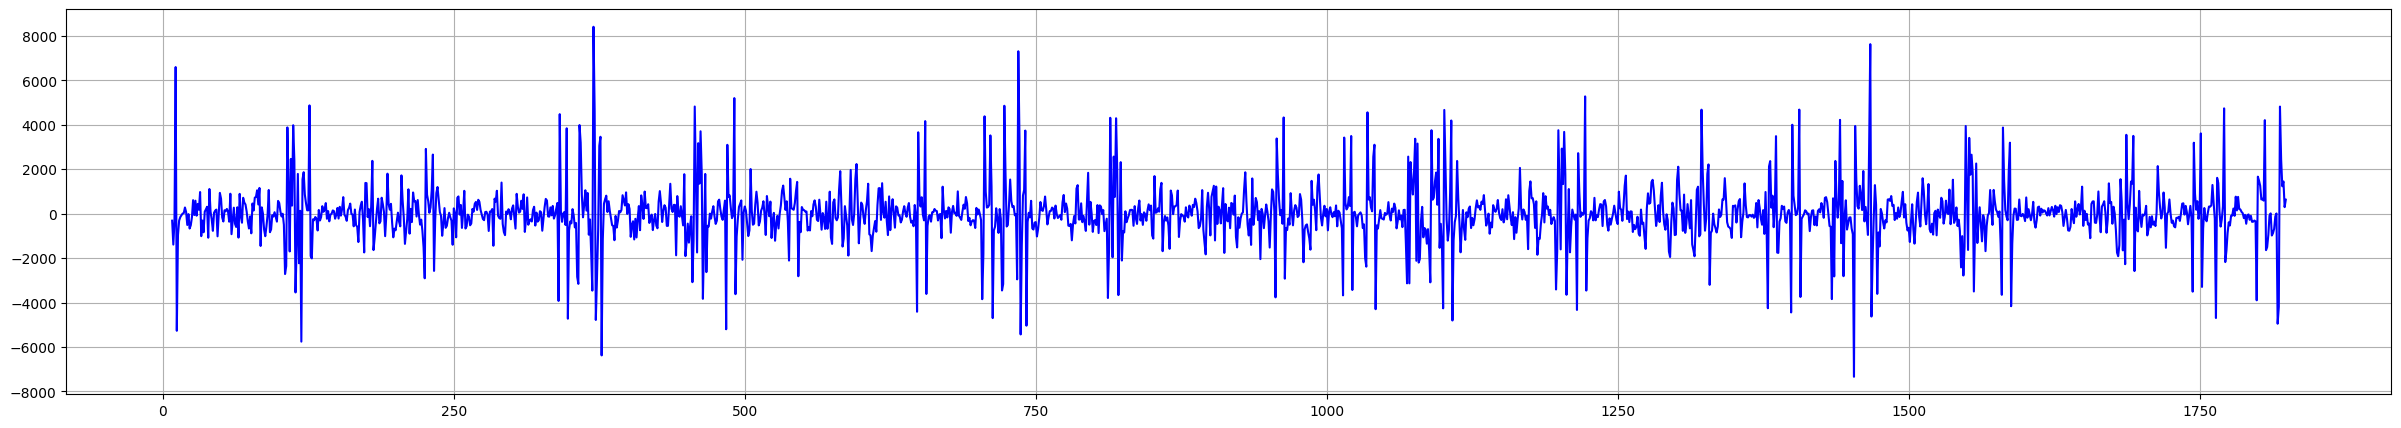

In [8]:
fig = plt.figure(figsize=(30,5))
plt.plot(s1, label='time series', color='b')
plt.grid()

In [24]:
d1 = (s[1:]-s1)[7:]
d7 = s1[7:]-s7
r = s7 + d7 + d1

In [26]:
(s[8:]==r).all()

True

# ACEA

In [5]:
mat = loadmat('TS_Acea.mat')  # load mat-file
ACEA_data = mat['X'] # original resolution (1 = 10 mins)
ACEA_data = ACEA_data[::6] # hourly forecast

# remove 11 weeks anomaly in the dataset
data = np.concatenate((ACEA_data[:16000], ACEA_data[16000+168*11:]))

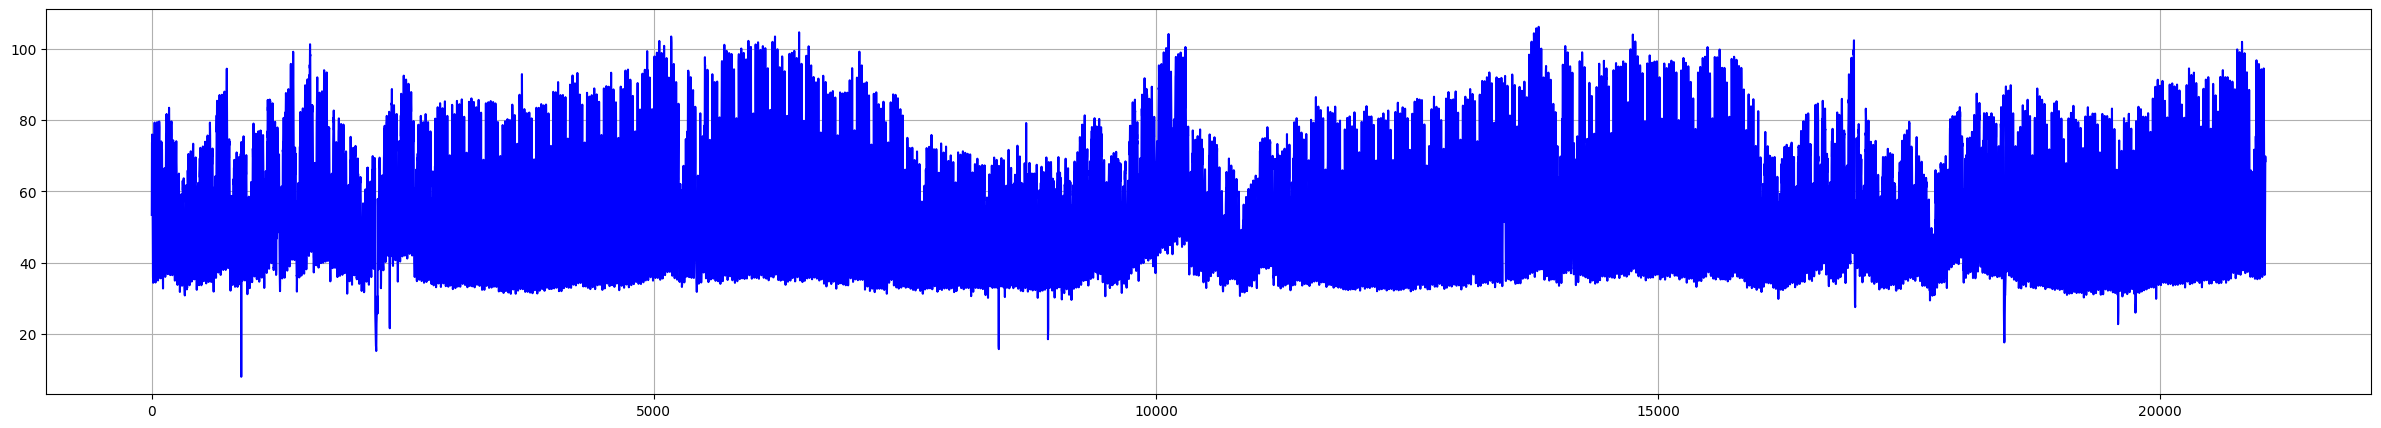

In [6]:
fig = plt.figure(figsize=(30,5))
plt.plot(data, label='time series', color='b')
plt.grid()

(0.0, 100.0)

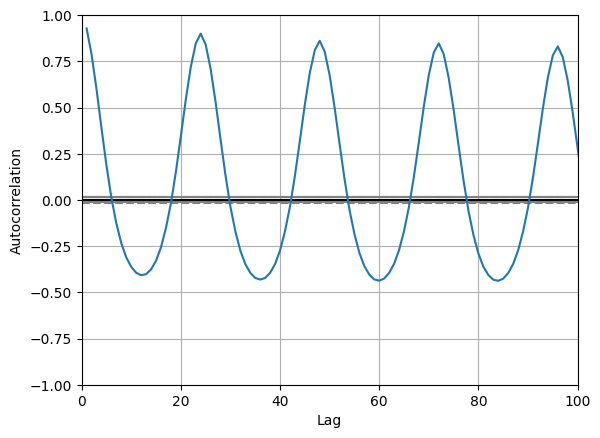

In [10]:
s = pd.Series(data.squeeze(), copy=True)
ax = pd.plotting.autocorrelation_plot(s)
ax.set_xlim([0, 100])

(0.0, 200.0)

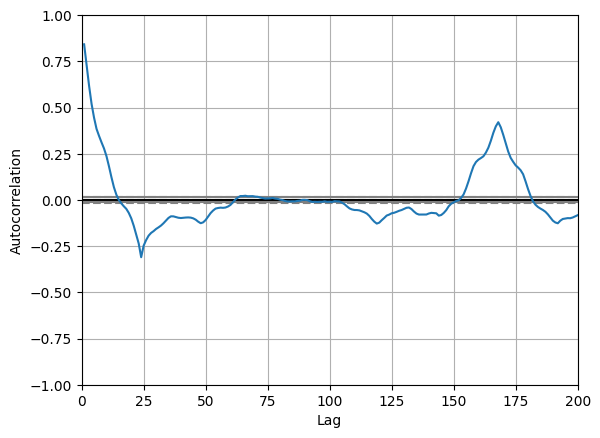

In [16]:
s24 = s.diff(periods=24)[24:]
ax = pd.plotting.autocorrelation_plot(s24)
ax.set_xlim([0, 200])

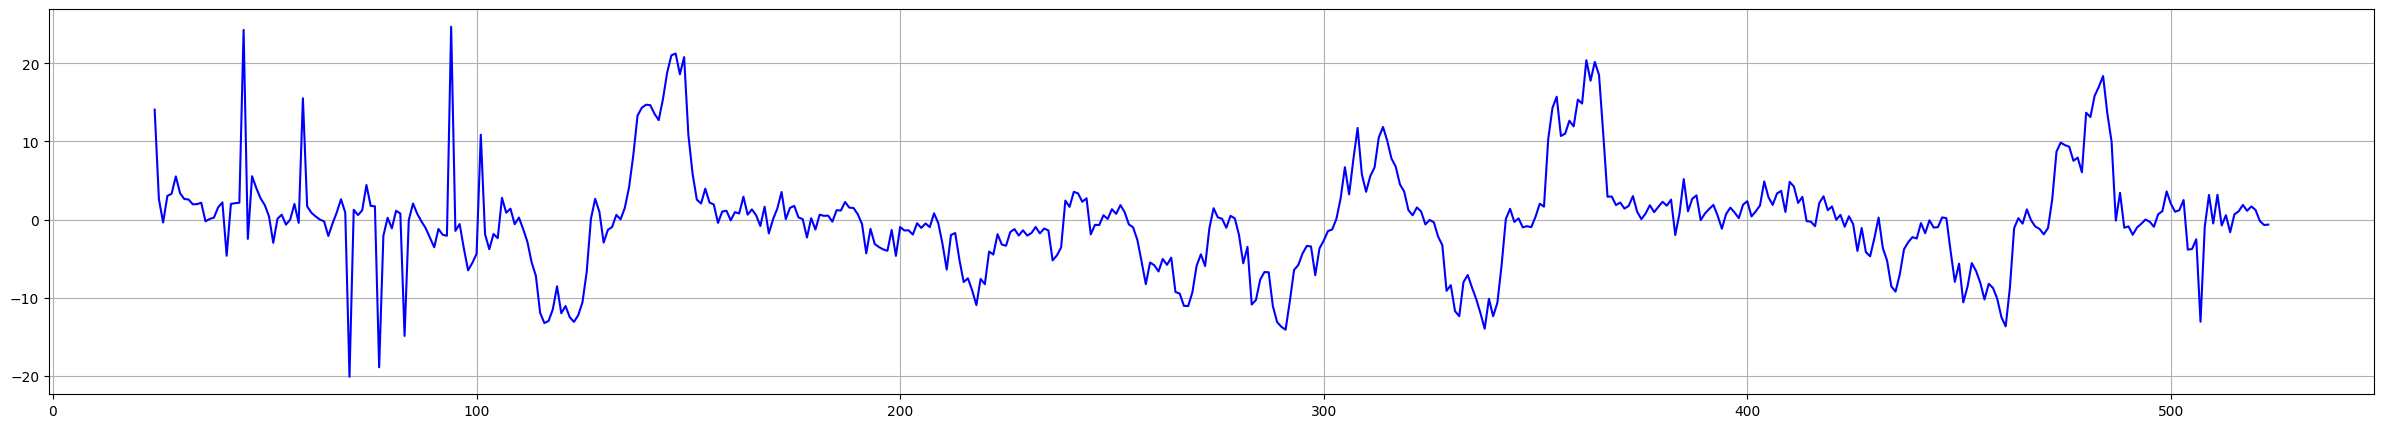

In [20]:
fig = plt.figure(figsize=(30,5))
plt.plot(s24[:500], label='time series', color='b')
plt.grid()